## 省份聚类分析

In [46]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

### 数据读取

In [2]:
df_data = pd.read_excel('./Province.xlsx')
df_data.head()

,Province,Birth_Rate,Death_Rate
0,北京市,9.32,5.20
1,天津市,7.37,5.54
2,河北省,12.42,6.36
3,山西省,10.29,5.52
4,内蒙古自治区,9.03,5.69


### 散点图概览

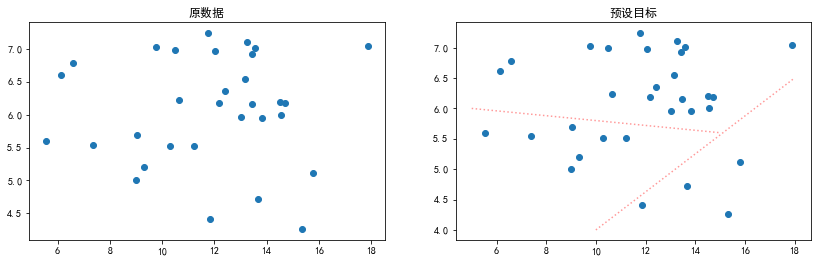

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,4)
ax[0].scatter(df_data['Birth_Rate'], df_data['Death_Rate'])
ax[0].set_title('原数据')

ax[1].scatter(df_data['Birth_Rate'], df_data['Death_Rate'])
ax[1].plot([10,18], [4,6.5], linestyle=':', color='r', alpha=0.4)
ax[1].plot([5,15], [6,5.6], linestyle=':', color='r', alpha=0.4)
ax[1].set_title('预设目标')

plt.show()

### 模型初训练

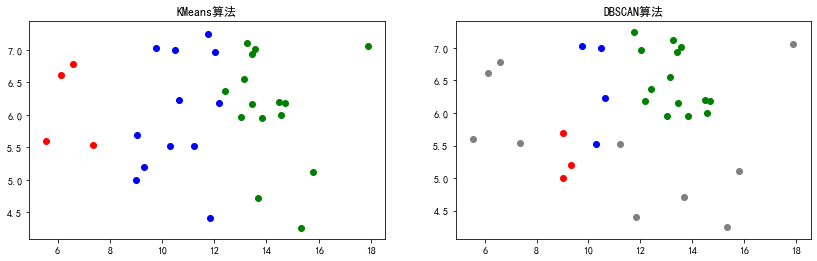

In [4]:
kmeans = KMeans(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=3)
fig, ax = plt.subplots(1,2)
fig.set_size_inches(14,4)
makers = ['D','*','h','.','o','8']
colors = ['r','g','b','gray','y','c']
for as_idx, model in enumerate([kmeans, dbscan]):
    model.fit(df_data[['Birth_Rate', 'Death_Rate']])
    model_labels = model.labels_
    for mak_idx, label in enumerate(set(model_labels.tolist())):
        sca_data = df_data.iloc[np.where(model_labels==label)[0].tolist()]
        ax[as_idx].scatter(sca_data['Birth_Rate'], sca_data['Death_Rate'], c=colors[mak_idx])
        ax[as_idx].set_title(re.findall('(\S+)\(', str(model))[0] + '算法')
plt.show()

### 模型调优

#### KMeans

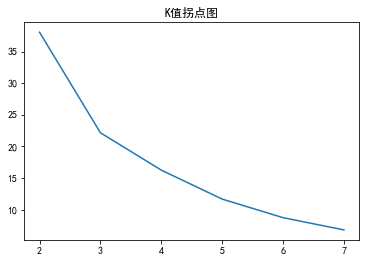

In [64]:
K = [x for x in range(2,8)]
result = []
for k in K:
    sse = 0
    kmeans = KMeans(n_clusters=k)
    train_features = StandardScaler().fit_transform(df_data[['Birth_Rate', 'Death_Rate']])
    kmeans.fit(train_features)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    for label in set(labels):
        array = train_features[np.where(labels==label)[0].tolist(),:]
        sse = np.sum((array - centers[label,:])**2) + sse
    result.append([k,sse])
x = [x[0] for x in result]
y = [x[1] for x in result]
plt.title('K值拐点图')
plt.plot(x,y)
plt.show()

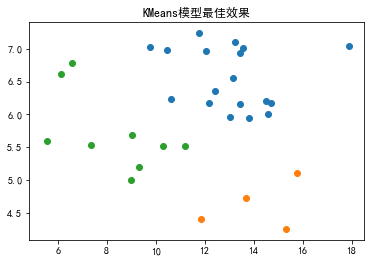

In [63]:
kmeans = KMeans(n_clusters=3)
train_features = MinMaxScaler().fit_transform(df_data[['Birth_Rate', 'Death_Rate']])
kmeans.fit(train_features)
labels = kmeans.labels_
for label in set(labels):
    plt_data = df_data.iloc[np.where(labels==label)[0],:]
    plt.scatter(plt_data['Birth_Rate'], plt_data['Death_Rate'])
plt.title('KMeans模型最佳效果')
plt.show()

#### DBSCAN

In [135]:
eps_s = [x/1000 for x in range(1,1000,5)]
min_samples_s = [x for x in range(2,8)]
# df_result = pd.DataFrame(columns=['eps','min_samples','n_clusters','state'])
data_dic={'eps':[], 'min_samples':[], 'n_clusters':[], 'outer':[], 'state':[]}
for eps in eps_s:
    for min_samples in min_samples_s:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        train_features = MinMaxScaler().fit_transform(df_data[['Birth_Rate', 'Death_Rate']])
        dbscan.fit(train_features)
        labels = dbscan.labels_
        data_dic['eps'].append(eps)
        data_dic['min_samples'].append(min_samples)
        data_dic['n_clusters'].append(len(set(labels)))
        data_dic['outer'].append(len([x for x in labels if x==-1]))
        cluster_label = labels[labels!=-1]
        state_list = pd.Series(cluster_label).value_counts().tolist()      
        data_dic['state'].append(state_list)
df_result = pd.DataFrame(data_dic)
df_result.head()

,eps,min_samples,n_clusters,outer,state
0,0.001,2,1,31,[]
1,0.001,3,1,31,[]
2,0.001,4,1,31,[]
3,0.001,5,1,31,[]
4,0.001,6,1,31,[]


In [137]:
df_result.query('n_clusters==4 and outer<=5')
df_result.iloc[247,:]

eps                 0.206
min_samples             3
n_clusters              4
outer                   4
state          [17, 7, 3]
Name: 247, dtype: object

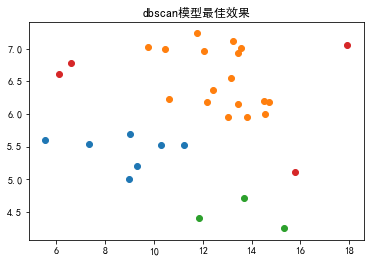

In [139]:
dbscan = DBSCAN(eps=0.206, min_samples=3)
train_features = MinMaxScaler().fit_transform(df_data[['Birth_Rate', 'Death_Rate']])
dbscan.fit(train_features)
labels = dbscan.labels_
for label in set(labels):
    plt_data = df_data.iloc[np.where(labels==label)[0],:]
    plt.scatter(plt_data['Birth_Rate'], plt_data['Death_Rate'])
plt.title('dbscan模型最佳效果')
plt.show()